In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
from sklearn import datasets

In [4]:
print(dir(datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_f

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()
x = data.data
y = data.target

In [7]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
df.shape

(569, 33)

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Checking Duplicates

In [11]:
df.duplicated().sum()

0

### Handling Null values

In [13]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Dropping Unnecessary columns

In [15]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [16]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
df.drop('id',axis=1,inplace=True)

In [19]:
df.shape

(569, 31)

In [20]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Seprating Cat and Num Columns

In [22]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [23]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index

In [24]:
cat_cols

Index(['diagnosis'], dtype='object')

In [25]:
num_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Univariate Analysis 

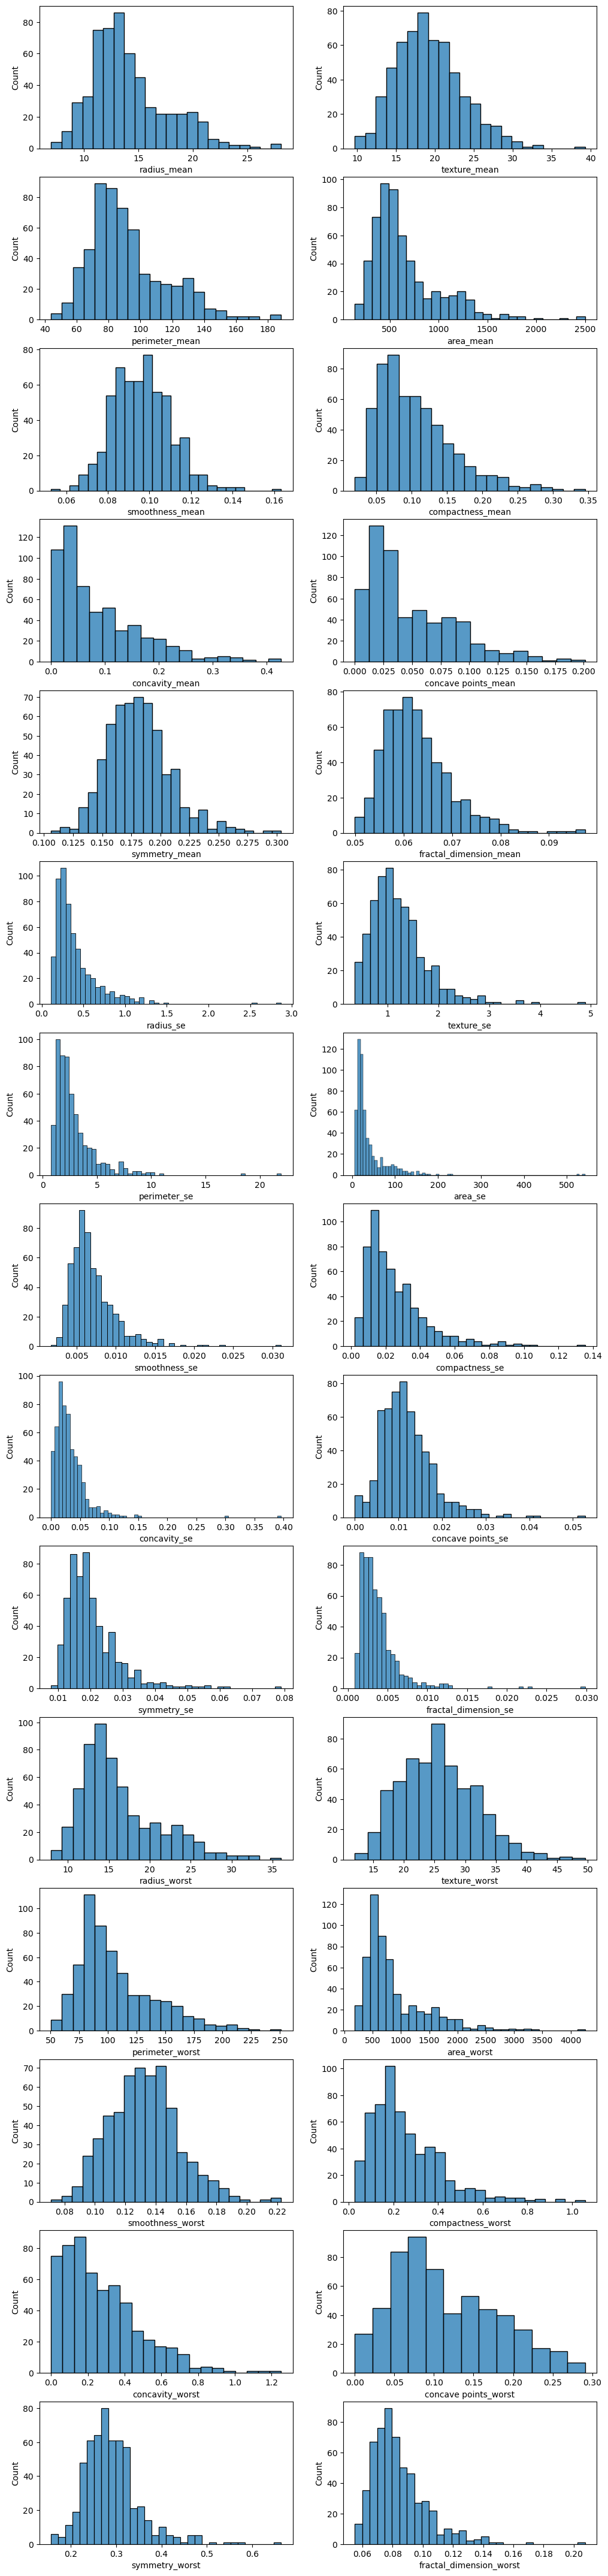

In [27]:
cols = num_cols
plt.figure(figsize=(12,55))
for i in range(len(cols)):
    plt.subplot(15,2,i+1)
    sns.histplot(x=df[cols[i]])
plt.show()

In [28]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### Bivariate Analysis num--cat

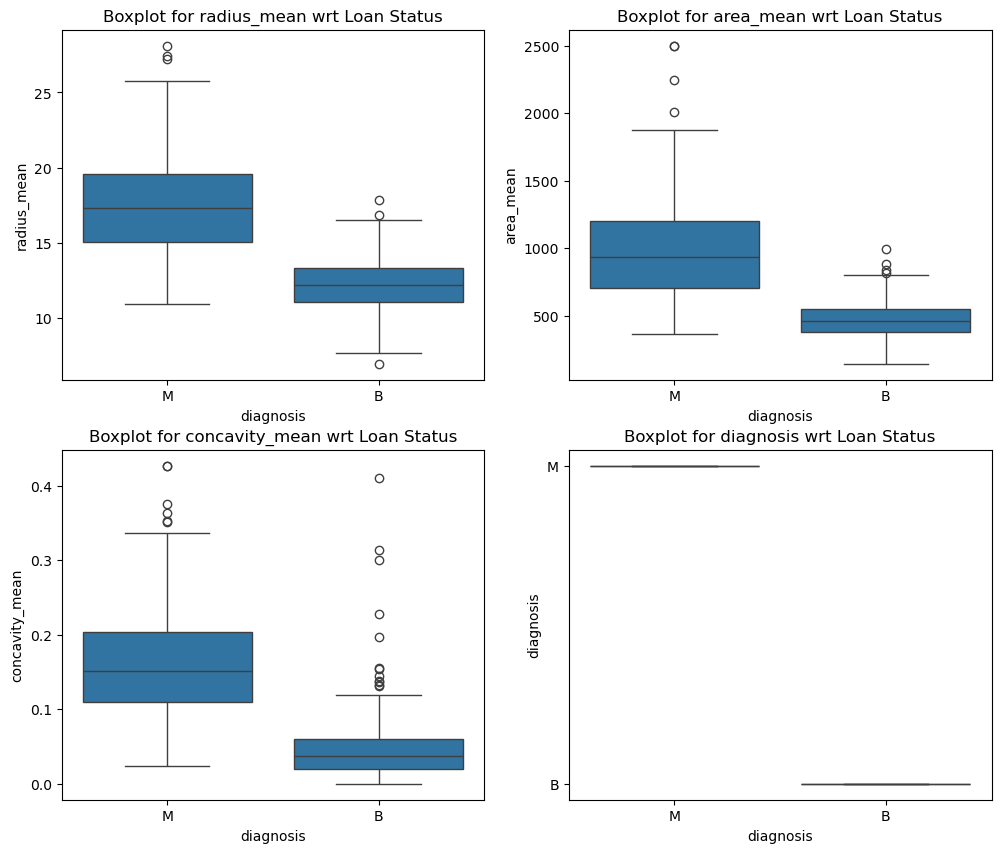

In [30]:
cols=['radius_mean', 'area_mean', 'concavity_mean','diagnosis']
plt.figure(figsize=(12,10))
for i in range(len(cols)):  # i = 0,1,2,3,4,5
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df['diagnosis'],y=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]} wrt Loan Status')
plt.show()

In [31]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### Bi-Variate Analysis

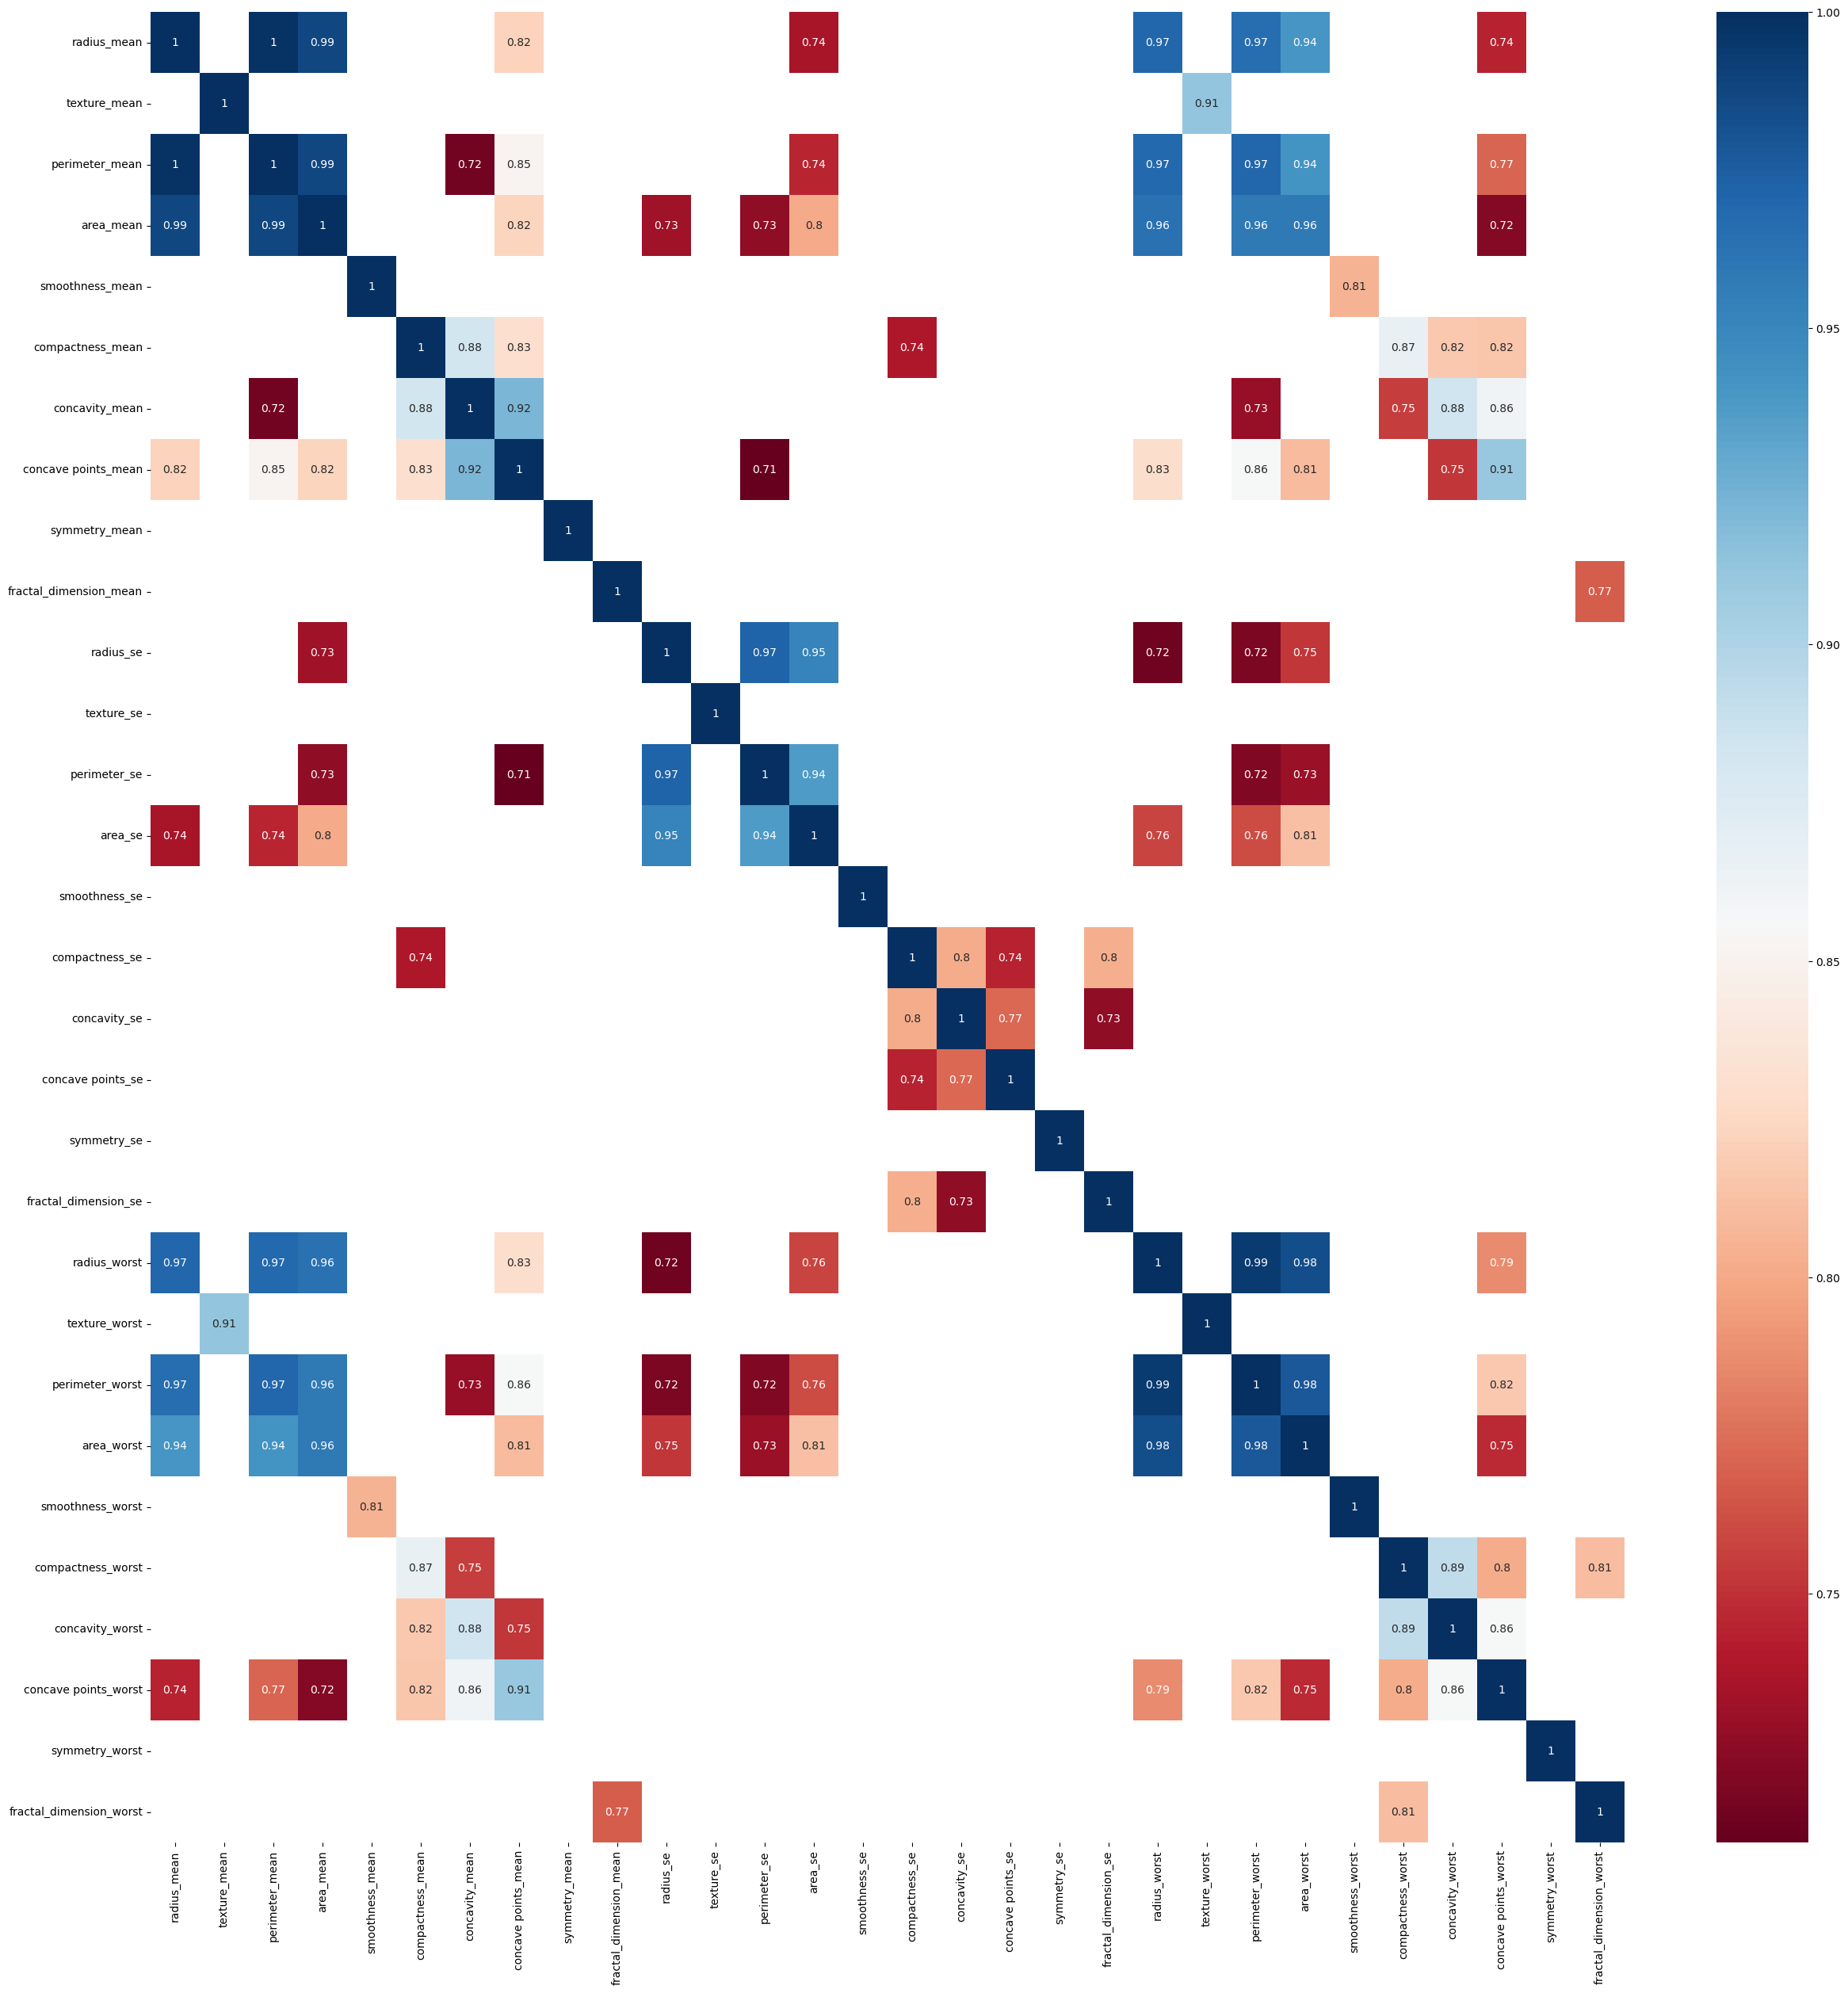

In [34]:
corr = df[num_cols].corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='RdBu')
plt.show()


In [35]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
radius_mean,6.981000,8.458360,8.728880,9.529200,13.370000,20.576000,22.794800,24.371600,28.11000
texture_mean,9.710000,10.930400,12.188000,13.088000,18.840000,27.150000,29.315600,30.652000,39.28000
perimeter_mean,43.790000,53.827600,55.475200,60.496000,86.240000,135.820000,152.100000,165.724000,188.50000
area_mean,143.500000,215.664000,232.124000,275.780000,551.100000,1309.800000,1625.360000,1786.600000,2501.00000
smoothness_mean,0.052630,0.068654,0.070126,0.075042,0.095870,0.118780,0.126724,0.132888,0.16340
compactness_mean,0.019380,0.033351,0.035884,0.040660,0.092630,0.208700,0.240688,0.277192,0.34540
concavity_mean,0.000000,0.000000,0.000000,0.004983,0.061540,0.243020,0.317528,0.351688,0.42680
concave points_mean,0.000000,0.000000,0.000000,0.005621,0.033500,0.125740,0.150292,0.164208,0.20120
symmetry_mean,0.106000,0.129508,0.134936,0.141500,0.179200,0.230720,0.253188,0.259564,0.30400
fractal_dimension_mean,0.049960,0.051504,0.052473,0.053926,0.061540,0.076090,0.080831,0.085438,0.09744


In [36]:
for i in num_cols:
    upper = df[i].quantile(0.99)
    print(i,upper,'Count of outliers: ',df[df[i]>upper].shape[0])

radius_mean 24.37160000000002 Count of outliers:  6
texture_mean 30.652000000000005 Count of outliers:  6
perimeter_mean 165.72400000000002 Count of outliers:  6
area_mean 1786.600000000004 Count of outliers:  6
smoothness_mean 0.13288800000000003 Count of outliers:  6
compactness_mean 0.27719200000000005 Count of outliers:  6
concavity_mean 0.35168800000000006 Count of outliers:  6
concave points_mean 0.16420800000000035 Count of outliers:  6
symmetry_mean 0.259564 Count of outliers:  6
fractal_dimension_mean 0.08543760000000016 Count of outliers:  6
radius_se 1.29132 Count of outliers:  6
texture_se 2.915440000000001 Count of outliers:  6
perimeter_se 9.690040000000009 Count of outliers:  6
area_se 177.68400000000017 Count of outliers:  6
smoothness_se 0.017258000000000006 Count of outliers:  6
compactness_se 0.08987200000000028 Count of outliers:  6
concavity_se 0.1222920000000004 Count of outliers:  6
concave points_se 0.031193600000000148 Count of outliers:  6
symmetry_se 0.052208

In [37]:
for i in num_cols:
    lower = df[i].quantile(0.01)
    print(i,upper,'Count Of Outliers',df[df[i]<lower].shape[0])

radius_mean 0.14062800000000003 Count Of Outliers 6
texture_mean 0.14062800000000003 Count Of Outliers 6
perimeter_mean 0.14062800000000003 Count Of Outliers 6
area_mean 0.14062800000000003 Count Of Outliers 6
smoothness_mean 0.14062800000000003 Count Of Outliers 6
compactness_mean 0.14062800000000003 Count Of Outliers 6
concavity_mean 0.14062800000000003 Count Of Outliers 0
concave points_mean 0.14062800000000003 Count Of Outliers 0
symmetry_mean 0.14062800000000003 Count Of Outliers 6
fractal_dimension_mean 0.14062800000000003 Count Of Outliers 6
radius_se 0.14062800000000003 Count Of Outliers 6
texture_se 0.14062800000000003 Count Of Outliers 6
perimeter_se 0.14062800000000003 Count Of Outliers 6
area_se 0.14062800000000003 Count Of Outliers 6
smoothness_se 0.14062800000000003 Count Of Outliers 6
compactness_se 0.14062800000000003 Count Of Outliers 6
concavity_se 0.14062800000000003 Count Of Outliers 0
concave points_se 0.14062800000000003 Count Of Outliers 0
symmetry_se 0.140628000

In [38]:
for i in num_cols:
    upper = df[i].quantile(0.99)
    df[i] = np.where(df[i]>upper,upper,df[i])

In [39]:
for i in num_cols:
    lower = df[i].quantile(0.01)
    df[i] = np.where(df[i]<lower,lower,df[i])

In [40]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
radius_mean,8.458360,8.534955,8.728880,9.529200,13.370000,20.576000,22.794800,24.288912,24.371600
texture_mean,10.930400,10.936928,12.188000,13.088000,18.840000,27.150000,29.315600,30.630240,30.652000
perimeter_mean,53.827600,54.006032,55.475200,60.496000,86.240000,135.820000,152.100000,165.571680,165.724000
area_mean,215.664000,219.428480,232.124000,275.780000,551.100000,1309.800000,1625.360000,1769.192000,1786.600000
smoothness_mean,0.068654,0.068774,0.070126,0.075042,0.095870,0.118780,0.126724,0.132692,0.132888
compactness_mean,0.033351,0.033745,0.035884,0.040660,0.092630,0.208700,0.240688,0.277061,0.277192
concavity_mean,0.000000,0.000000,0.000000,0.004983,0.061540,0.243020,0.317528,0.351492,0.351688
concave points_mean,0.000000,0.000000,0.000000,0.005621,0.033500,0.125740,0.150292,0.162707,0.164208
symmetry_mean,0.129508,0.130183,0.134936,0.141500,0.179200,0.230720,0.253188,0.259520,0.259564
fractal_dimension_mean,0.051504,0.051678,0.052473,0.053926,0.061540,0.076090,0.080831,0.084800,0.085438


In [41]:
# Split into features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]
print(x.shape,y.shape)

(569, 30) (569,)


In [42]:
print(x.shape,y.shape)

(569, 30) (569,)


### splitting data into train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [45]:
from sklearn.metrics import*

## Function To Evaluate The Model

In [47]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    crep = classification_report(ytest,ypred)
    print(cm)
    print(crep)

### Model Building

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
import warnings
warnings.filterwarnings("ignore")  # Example: Ignore all warnings


In [51]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## [TN FP]
## [FN TP]

### WBDC => Cancerous state => M 
### Bengin => Non Cancerous state  => B 

In [53]:
ypred_lr1 = lr1.predict(X_test)
eval_model(y_test,ypred_lr1)

[[71  1]
 [ 7 35]]
              precision    recall  f1-score   support

           B       0.91      0.99      0.95        72
           M       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



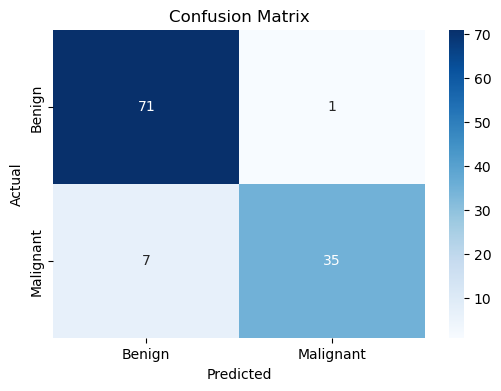

In [148]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, ypred_lr1) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [150]:
print('Train Score',lr1.score(X_train,y_train))
print('Test Score',lr1.score(X_test,y_test))

Train Score 0.9582417582417583
Test Score 0.9298245614035088


### Inference
Model is Overfit

In [153]:
## l2 - Ridge
## l1- Lasso


lr2 = LogisticRegression(max_iter=1000,penalty='l2',C=0.500,random_state=50)
lr2.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=1000, random_state=50)

In [155]:
print('Log Reg Without c')
print('Train Score',lr1.score(X_train,y_train))
print('Test Score',lr1.score(X_test,y_test))
print('Log Reg With c')
print('Train Score',lr2.score(X_train,y_train))
print('Test Score',lr2.score(X_test,y_test))

Log Reg Without c
Train Score 0.9582417582417583
Test Score 0.9298245614035088
Log Reg With c
Train Score 0.9516483516483516
Test Score 0.9385964912280702


### Hyper parameter tuning

In [158]:
C_val = np.random.random(20)
C_val

array([0.43449876, 0.84020877, 0.79314773, 0.06776405, 0.89116777,
       0.22691388, 0.16372535, 0.63761711, 0.79115962, 0.6047425 ,
       0.76059989, 0.91467105, 0.51634258, 0.76109569, 0.93305809,
       0.28412308, 0.53578842, 0.14169636, 0.04224887, 0.04718244])

In [160]:
all_res =[]
for i in C_val:
    model = LogisticRegression(max_iter=10000,penalty='l2',C=i)
    model.fit(X_train,y_train)
    train_sc = model.score(X_train,y_train)
    test_sc = model.score(X_test,y_test)
    res = {'C':i,'Train_Acc':train_sc,'Test_Acc':test_sc}
    all_res.append(res)
res_df= pd.DataFrame(all_res)
res_df

,C,Train_Acc,Test_Acc
0,0.434499,0.958242,0.938596
1,0.840209,0.960440,0.938596
2,0.793148,0.960440,0.938596
3,0.067764,0.953846,0.938596
4,0.891168,0.960440,0.938596
5,0.226914,0.956044,0.938596
6,0.163725,0.953846,0.938596
7,0.637617,0.958242,0.947368
8,0.791160,0.960440,0.938596
9,0.604743,0.958242,0.938596


## Roc Auc

In [162]:
y_test1 = y_test.replace({'M':1,'B':0})
y_train1 = y_train.replace({'M':1,'B':0})

In [167]:
ypred_proba = lr1.predict_proba(X_test)
print(len(ypred_proba))
ypred_proba[:9]

114


array([[9.99384916e-01, 6.15084050e-04],
       [3.98302724e-10, 1.00000000e+00],
       [9.95742578e-01, 4.25742190e-03],
       [4.04445907e-01, 5.95554093e-01],
       [2.13151005e-01, 7.86848995e-01],
       [9.97999411e-01, 2.00058863e-03],
       [7.30297649e-01, 2.69702351e-01],
       [9.98536305e-01, 1.46369495e-03],
       [9.99232270e-01, 7.67730315e-04]])

In [169]:
ypred_lr1[:9]

array(['B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B'], dtype=object)

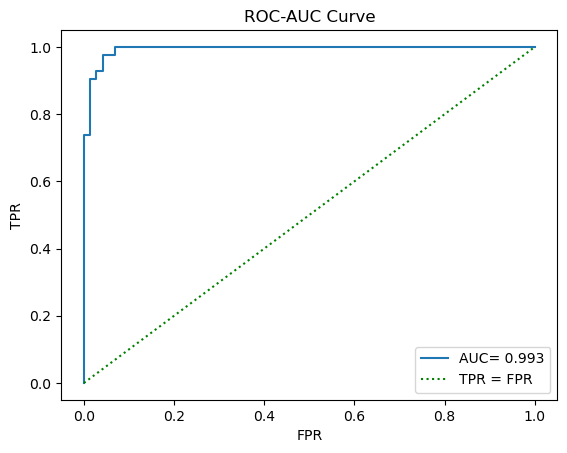

In [173]:
fpr,tpr,thresh = roc_curve(y_test1,ypred_proba[:,1])
auc_score= roc_auc_score(y_test1,ypred_proba[:,1])
plt.plot(fpr,tpr,label=f'AUC= {round(auc_score,3)}')
plt.plot([0,1],[0,1],label= 'TPR = FPR',color='green',linestyle='dotted')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

### Best thresh

In [176]:
print(len(thresh))

12


In [184]:
best_thresh = thresh[np.argmax(tpr*(1-fpr))]
print(best_thresh)

0.22179414930567604


In [186]:
ypred_best_thresh = np.where(ypred_proba[:,1]>best_thresh,1,0)

In [188]:
eval_model(y_test1,ypred_best_thresh) 

[[69  3]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [192]:
from sklearn.model_selection import cross_val_score

In [194]:
lr_base = LogisticRegression(max_iter=10000)
scores = cross_val_score(lr_base,x,y,scoring='accuracy',cv = 5)
print(scores)
print('Mean Score',np.mean(scores))

[0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Mean Score 0.9507995652848935
